# Explore the administrative boundaries of the NYC neighborhoods

In [1]:
import geopandas as gpd

195
{2000, 2010}


,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
195,Bronx,2010,5,BX01,Claremont-Bathgate,31078


,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry
0,QN08,77412747.756,081,St. Albans,45401.3169155,Queens,4,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ..."


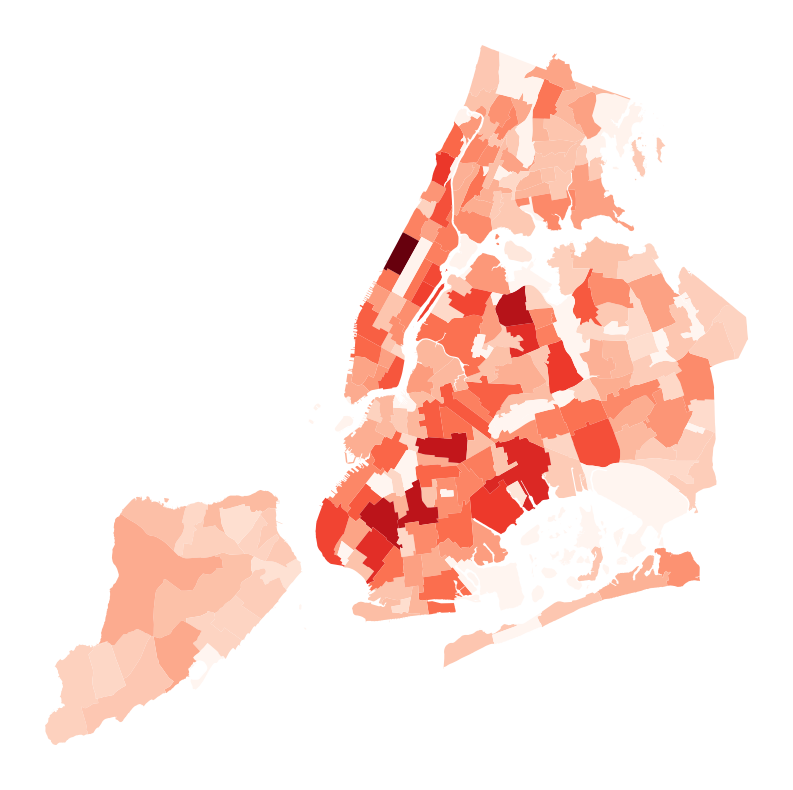

In [4]:
%run 04_04_enrich.ipynb

In [8]:
gdf_merged = gdf.merge(df, right_on = 'NTA Code', left_on = 'ntacode')
# gdf_merged = gdf_merged[['ntacode', 'geometry', 'Population']]
gdf_merged.head(3)

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,QN08,77412747.756,081,St. Albans,45401.3169155,Queens,4,"MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...",Queens,2010,81,QN08,St. Albans,48593
1,BK50,82089678.5561,047,Canarsie,43703.6099368,Brooklyn,3,"MULTIPOLYGON (((-73.88834 40.64671, -73.88835 ...",Brooklyn,2010,47,BK50,Canarsie,83693
2,BX41,14716710.849,005,Mount Hope,18937.2480746,Bronx,2,"MULTIPOLYGON (((-73.89561 40.85457, -73.89662 ...",Bronx,2010,5,BX41,Mount Hope,51807


In [9]:
gdf_manhattan = gdf_merged[gdf_merged.boro_name=='Manhattan']
gdf_manhattan

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
45,MN19,17390168.1386,061,Turtle Bay-East Midtown,21251.8414488,Manhattan,1,"MULTIPOLYGON (((-73.96052 40.74411, -73.96057 ...",Manhattan,2010,61,MN19,Turtle Bay-East Midtown,51231
47,MN04,15984383.0261,061,Hamilton Heights,17103.3632867,Manhattan,1,"MULTIPOLYGON (((-73.94035 40.83046, -73.94014 ...",Manhattan,2010,61,MN04,Hamilton Heights,48520
48,MN50,5575563.18924,061,Stuyvesant Town-Cooper Village,11061.8187289,Manhattan,1,"MULTIPOLYGON (((-73.96237 40.72421, -73.96201 ...",Manhattan,2010,61,MN50,Stuyvesant Town-Cooper Village,21049
53,MN36,23127085.735,061,Washington Heights South,22143.3421167,Manhattan,1,"MULTIPOLYGON (((-73.93139 40.84743, -73.93185 ...",Manhattan,2010,61,MN36,Washington Heights South,84438
54,MN34,24494917.0275,061,East Harlem North,30603.6946289,Manhattan,1,"MULTIPOLYGON (((-73.92719 40.79735, -73.92735 ...",Manhattan,2010,61,MN34,East Harlem North,58019
55,MN27,14501876.7432,061,Chinatown,20786.2546133,Manhattan,1,"MULTIPOLYGON (((-73.98382 40.72147, -73.98386 ...",Manhattan,2010,61,MN27,Chinatown,47844
56,MN21,7526916.50304,061,Gramercy,12096.890667,Manhattan,1,"MULTIPOLYGON (((-73.97854 40.73689, -73.97857 ...",Manhattan,2010,61,MN21,Gramercy,27988
57,MN40,20065364.3292,061,Upper East Side-Carnegie Hill,23778.4107607,Manhattan,1,"MULTIPOLYGON (((-73.94933 40.78519, -73.94982 ...",Manhattan,2010,61,MN40,Upper East Side-Carnegie Hill,61207
58,MN33,16650685.4972,061,East Harlem South,18624.6609107,Manhattan,1,"MULTIPOLYGON (((-73.93505 40.79169, -73.93511 ...",Manhattan,2010,61,MN33,East Harlem South,57902
67,MN11,14441227.8364,061,Central Harlem South,16624.4627175,Manhattan,1,"MULTIPOLYGON (((-73.94177 40.80709, -73.94226 ...",Manhattan,2010,61,MN11,Central Harlem South,43383


In [10]:
gdf_manhattan_local = gdf_manhattan.to_crs(2263)
gdf_merged = gdf_merged.to_crs(2263)

<Axes: >

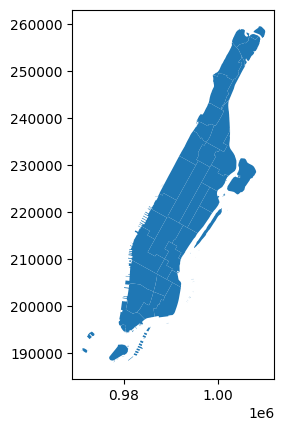

In [11]:
gdf_manhattan_local.plot()

In [12]:
distances = [100, 1000, 5000, 10000, 25000, 100000]

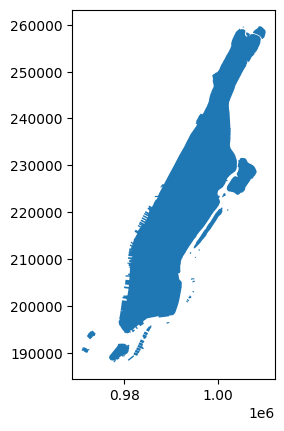

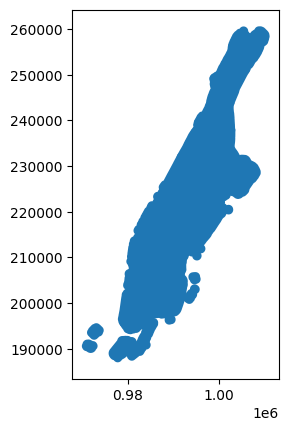

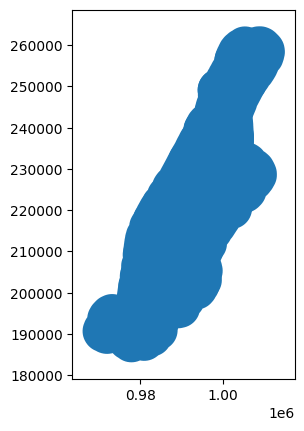

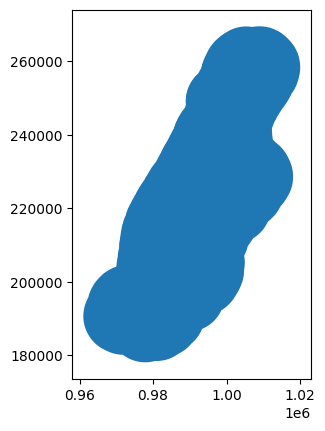

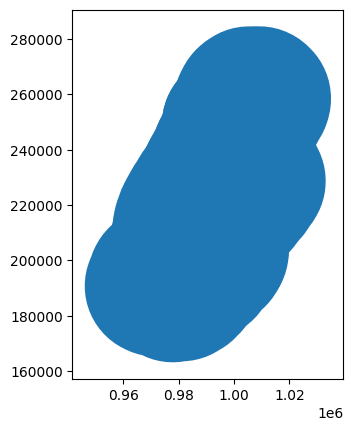

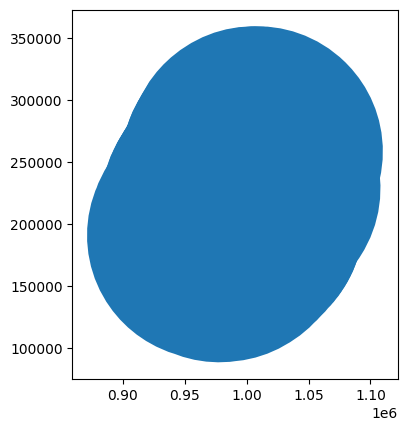

In [13]:
for distance in distances:
    gdf_manhattan_local.buffer(distance).plot()

<Axes: >

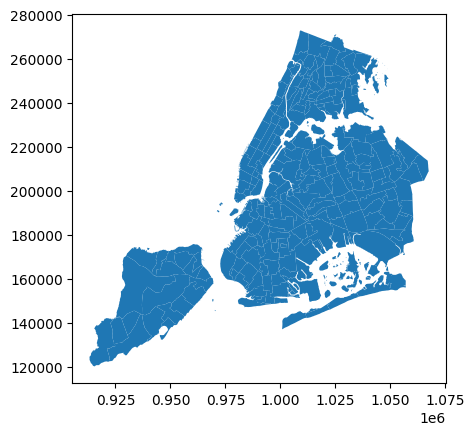

In [14]:
gdf_merged.plot()

In [16]:
gdf_merged_local_points = gdf_merged.copy()
gdf_merged_local_points['geometry'] = [g.centroid for g in list(gdf_merged_local_points.geometry)]
gdf_merged_local_points.head(3)

,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,geometry,Borough,Year,FIPS County Code,NTA Code,NTA Name,Population
0,QN08,77412747.756,081,St. Albans,45401.3169155,Queens,4,POINT (1049933.65 191188.479),Queens,2010,81,QN08,St. Albans,48593
1,BK50,82089678.5561,047,Canarsie,43703.6099368,Brooklyn,3,POINT (1012073.055 171748.235),Brooklyn,2010,47,BK50,Canarsie,83693
2,BX41,14716710.849,005,Mount Hope,18937.2480746,Bronx,2,POINT (1010498.971 248626.411),Bronx,2010,5,BX41,Mount Hope,51807


<Axes: >

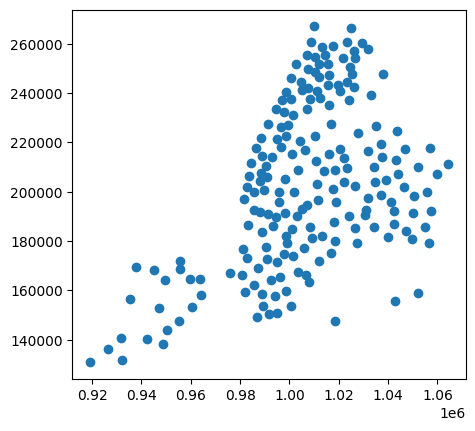

In [17]:
gdf_merged_local_points.plot()

<Axes: >

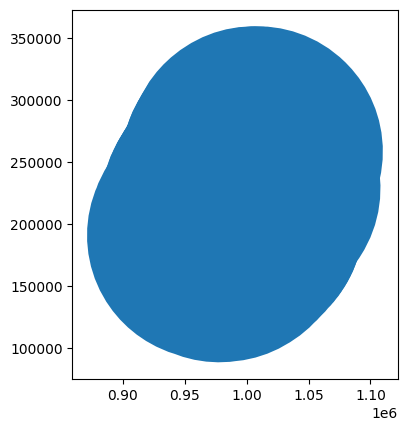

In [18]:
# buffering
distance = 100000
gdf_manhattan_local_buffered = gdf_manhattan_local.copy()
gdf_manhattan_local_buffered['geometry'] = gdf_manhattan_local_buffered['geometry'].buffer(distance)
gdf_manhattan_local_buffered.plot()

<Axes: >

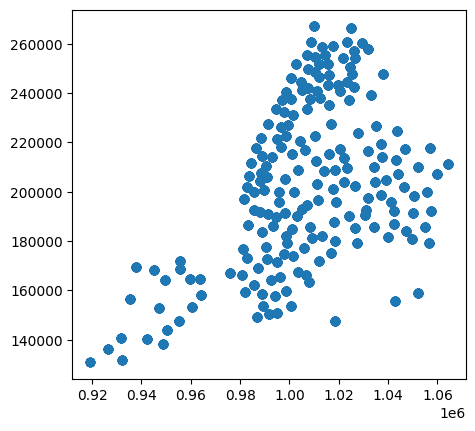

In [19]:
# spatial join
gdf_joined = gpd.sjoin(gdf_merged_local_points, gdf_manhattan_local_buffered)
gdf_joined.plot()

In [20]:
# compute population
print('Manhattan population: ', sum(gdf_joined.Population_left))
print('Buffer zone population: ', sum(gdf_joined.Population_right))
print('Population ratio: ', round(sum(gdf_joined.Population_left) / sum(gdf_joined.Population_right),2))

Manhattan population:  234058179
Buffer zone population:  302083724
Population ratio:  0.77


In [21]:
def count_populaiton_stats(distance):
    
    # buffering
    gdf_manhattan_local_buffered = gdf_manhattan_local.copy()
    gdf_manhattan_local_buffered['geometry'] = gdf_manhattan_local_buffered['geometry'].buffer(distance)
    gdf_manhattan_local_buffered.plot()
    
    
    # spatial join
    gdf_joined = gpd.sjoin(gdf_merged_local_points, gdf_manhattan_local_buffered)
    
    
    # compute population
    print('Zone size: ', distance, ' feet')
    print('Manhattan population: ', sum(gdf_joined.Population_left))
    print('Buffer zone population: ', sum(gdf_joined.Population_right))
    print('Population ratio: ', round(sum(gdf_joined.Population_left) / sum(gdf_joined.Population_right),2))
    print()

In [22]:
distances

[100, 1000, 5000, 10000, 25000, 100000]

Zone size:  100  feet
Manhattan population:  1585873
Buffer zone population:  1641926
Population ratio:  0.97

Zone size:  1000  feet
Manhattan population:  1797507
Buffer zone population:  1966404
Population ratio:  0.91

Zone size:  5000  feet
Manhattan population:  11454568
Buffer zone population:  11432763
Population ratio:  1.0

Zone size:  10000  feet
Manhattan population:  24556715
Buffer zone population:  25297507
Population ratio:  0.97

Zone size:  25000  feet
Manhattan population:  71911298
Buffer zone population:  79238550
Population ratio:  0.91

Zone size:  100000  feet
Manhattan population:  234058179
Buffer zone population:  302083724
Population ratio:  0.77



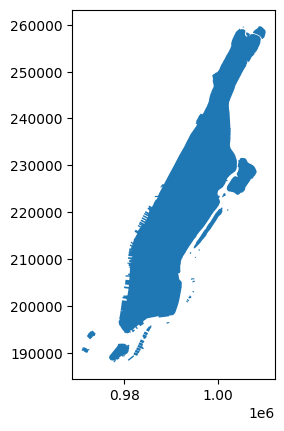

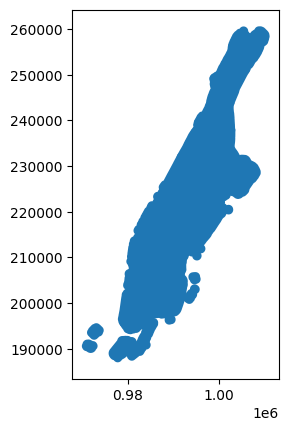

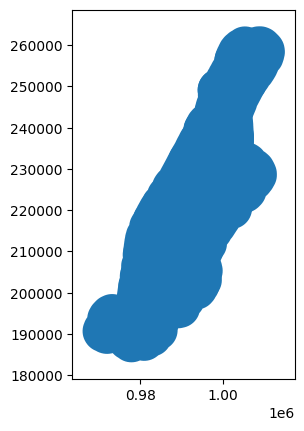

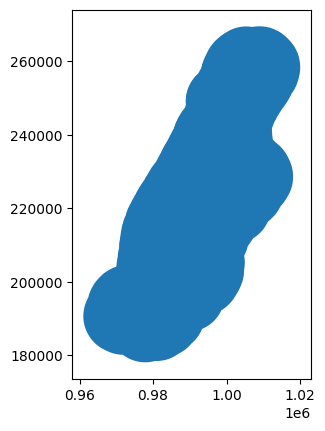

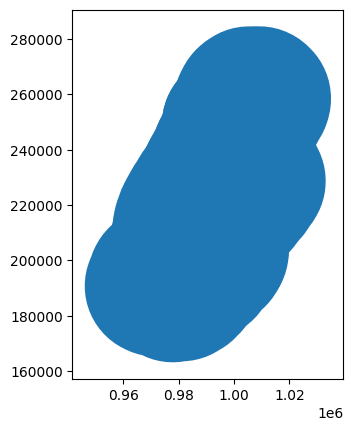

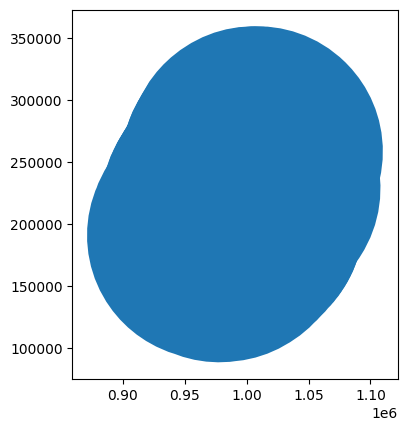

In [23]:
for distance in distances:
    count_populaiton_stats(distance)